In [5]:
from importlib import reload
import re
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = 'Arial'

from byc import constants, utilities, files, flow
for mod in [constants, utilities, files, flow]:
    reload(mod)

In [6]:
expts = flow.Experiments()
alldf = expts.exptdf('20200902')

alldf.loc[:, 'yfp_rfp'] = alldf['Alexa Fluor 488-A']/alldf['DsRed-A']
alldf.loc[:, 'rfp_yfp'] = alldf['DsRed-A']/alldf['Alexa Fluor 488-A']

09022020.xlsx
9-2-2020-bls_BLS751-1.fcs
9-2-2020-bls_BLS751-1_001.fcs
9-2-2020-bls_BLS752-1.fcs
9-2-2020-bls_BLS752-2.fcs
9-2-2020-bls_BLS753-1.fcs
9-2-2020-bls_BLS753-1_001.fcs
9-2-2020-bls_BLS754-1.fcs
9-2-2020-bls_BLS754-1_001.fcs
9-2-2020-bls_BLS755-1.fcs
9-2-2020-bls_BLS755-1_001.fcs
9-2-2020-bls_BLS756-1.fcs
9-2-2020-bls_BLS756-1_001.fcs
9-2-2020-bls_BLS757-1.fcs
9-2-2020-bls_BLS757-1_001.fcs
9-2-2020-bls_BLS758-1.fcs
9-2-2020-bls_BLS758-1_001.fcs
9-2-2020-bls_BLS759-1.fcs
9-2-2020-bls_BLS759-1_001.fcs
9-2-2020-bls_BLS760.fcs
9-2-2020-bls_BLS760_001.fcs
9-2-2020-bls_BLS761.fcs
9-2-2020-bls_BLS761_001.fcs
Found master index with 22
Looking for data at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20200902_BLS\data\9-2-2020-bls_BLS751-1.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20200902_BLS\data\9-2-2020-bls_BLS751-1_001.fcs
Found data
Found 10000 measurements in

### Scatter

In [11]:
# Plotting settings
kwargs = {'yscale': 'log',
          'xscale': 'log'}

alpha = 0.1

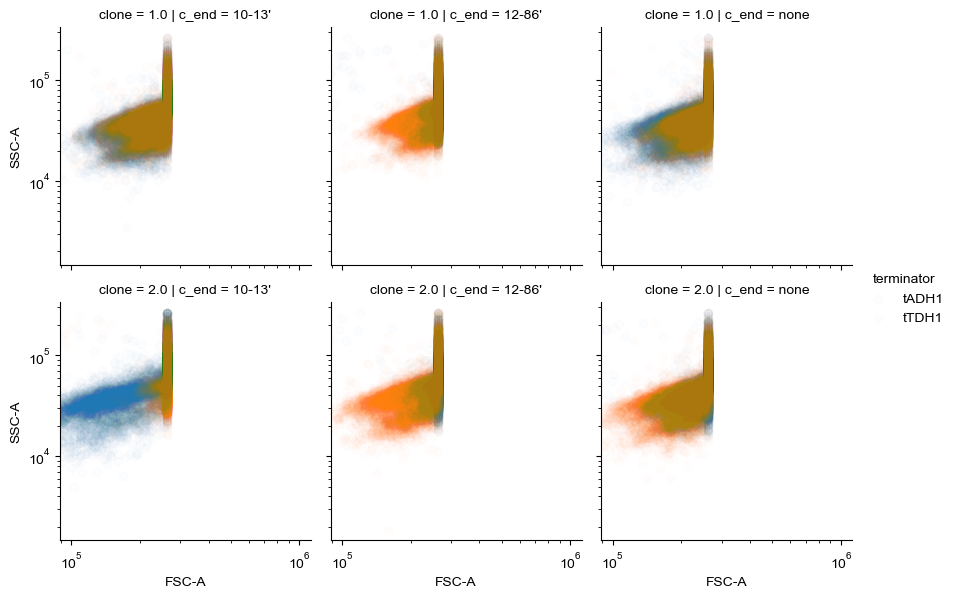

In [12]:
fluor = 'SYFP2'
save = False

x = 'FSC-A'
y = 'SSC-A'

refined = alldf.loc[alldf.fluorophore==fluor]
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, row='clone', col='c_end', hue='terminator',
                  height=3,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'])

g = g.map(plt.scatter, x, y, alpha=0.01).add_legend()

g.set(**kwargs)

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_all_scatter.png'))

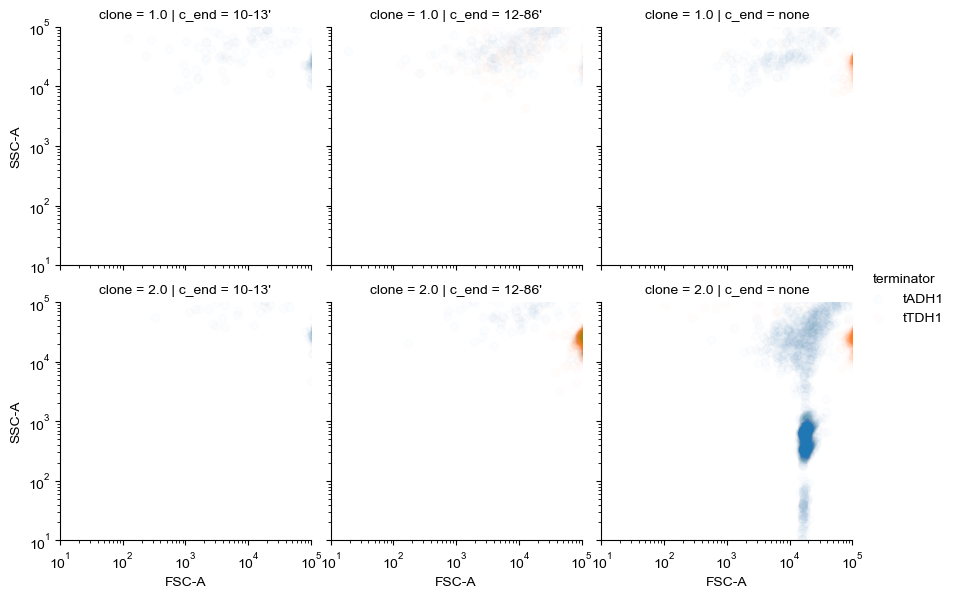

In [9]:
fluor = 'mScarletI'
save = False

x = 'FSC-A'
y = 'SSC-A'

refined = alldf.loc[alldf.fluorophore==fluor]
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, row='clone', col='c_end', hue='terminator',
                  height=3,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'])

g = g.map(plt.scatter, x, y, alpha=0.01).add_legend()

g.set(**kwargs)

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_all_scatter.png'))

### Fluorescence

In [106]:
# Plotting settings
kwargs = {'xlim': (10, 100000),
          'ylim': (10, 100000),
          'yscale': 'log',
          'xscale': 'log'}

alpha = 0.05
markersize=0.2

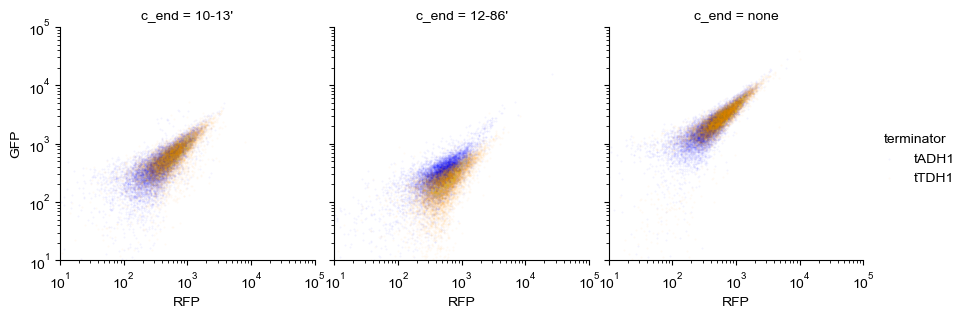

In [110]:
fluor = 'SYFP2'
save = True

refined = alldf.loc[alldf.fluorophore==fluor]
refined = refined.loc[refined.clone==1.0].sample(48000)
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, col='c_end', hue='terminator',
                  height=3.2,
                  aspect=0.94,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'],
                  palette=['blue', 'orange'])

g = g.map(plt.scatter, 'DsRed-A', 'Alexa Fluor 488-A',
          alpha=alpha,
          s=markersize)

g.add_legend()
g.set(**kwargs)
g.set_axis_labels("RFP", "GFP")
if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_80percent_single_clone.png'))

In [109]:
refined.columns

Index(['FSC-A', 'SSC-A', 'Alexa Fluor 405-A', 'Alexa Fluor 430-A',
       'Qdot 605-A', 'APC-A', 'Alexa Fluor 700-A', 'APC-Cy7-A',
       'Alexa Fluor 488-A', 'PerCP-Cy5-5-A', 'PE-A', 'DsRed-A', '7-AAD-A',
       'PE-Cy5-5-A', 'PE-Cy7-A', 'Time', 'strain', 'filepath', 'clone', 'name',
       'plasmid', 'control', 'n_end', 'fluorophore', 'c_end', 'terminator',
       'yfp_rfp', 'rfp_yfp'],
      dtype='object')

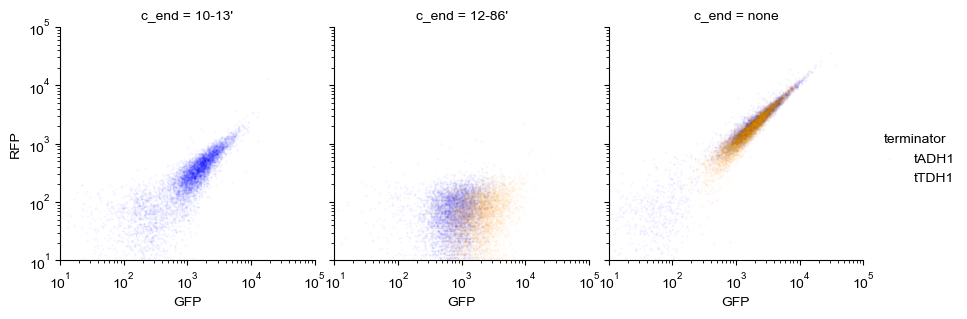

In [112]:
fluor = 'mScarletI'
save = True

refined = alldf.loc[alldf.fluorophore==fluor]
refined = refined.loc[refined.clone==2.0].sample(40000)
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, col='c_end', hue='terminator',
                  height=3.2,
                  aspect=0.94,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'],
                  palette=['blue', 'orange'])

g = g.map(plt.scatter, 'Alexa Fluor 488-A', 'DsRed-A',
          alpha=alpha,
          s=markersize)

g.add_legend()
g.set(**kwargs)
g.set_axis_labels('GFP', 'RFP')

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_80percent_single_clone.png'))

In [7]:
fluor = 'mScarletI'
save = False

refined = alldf.loc[alldf.fluorophore==fluor]
refined = refined.loc[refined.terminator=='tADH1']
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

ax = sns.boxplot(data=refined, x='c_end', y='rfp_yfp', hue='clone',
                 order=["10-13'", "12-86'", "none"])

# ax.set_yscale('log')
ax.set_ylim(-5, 5)

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_all.png'))

### 20201104

In [22]:
from importlib import reload
import re
import os

import numpy as np
import pandas as pd

from FlowCytometryTools import FCMeasurement

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = 'Arial'

from byc import constants, utilities, files, flow
for mod in [constants, utilities, files, flow]:
    reload(mod)


In [4]:
expts = flow.Experiments()
masterdf = expts.all_master_idx_dfs[2]
alldf = expts.exptdf('20201104', master_index_df=masterdf)

Found master index with 30 samples at
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_002.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_003.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_004.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_005.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_006.fcs
Found data
Found 10000 mea

In [6]:
alldf.columns

Index(['FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W',
       'Alexa Fluor 405-A', 'Alexa Fluor 430-A', 'Qdot 605-A', 'APC-A',
       'Alexa Fluor 700-A', 'APC-Cy7-A', 'Alexa Fluor 488-A', 'PerCP-Cy5-5-A',
       'PE-A', 'DsRed-A', '7-AAD-A', 'PE-Cy5-5-A', 'PE-Cy7-A', 'Time',
       'Unnamed: 0', 'Sample:', 'YFP', 'dsRed/YFP', 'dsRed', 'clone', 'strain',
       'N.End', 'substrate', 'Protein', 'Tail', 'Strain', 'Reference',
       'Expression', 'Location', 'expt_dir', 'filepath'],
      dtype='object')

In [10]:
table = pd.pivot_table(alldf, index=['substrate', 'clone'], aggfunc='mean').reset_index()

In [ ]:
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='WT',
                          markerfacecolor='w', markersize=6),
                  Line2D([0], [0], marker='o', color='black', label='$\it{rpn4}$\u0394',
                          markerfacecolor='w', markersize=6),
                  Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]]
ax.legend(handles=legend_elements, frameon=False, fontsize=12)

In [34]:
datadf.index.unique()

Index(['NLS-mScarletI', 'NLS-mScarletI-Bgl2', 'NLS-mScarletI-VHL',
       'RKK-mScarletI-NS', 'UBL-mScarletI-NS', 'mScarletI', 'mScarletI-10-13',
       'mScarletI-12-86-deg', 'mScarletI-CytoDeg', 'mScarletI-ERmDeg'],
      dtype='object', name='substrate')

In [39]:
len(order)

11

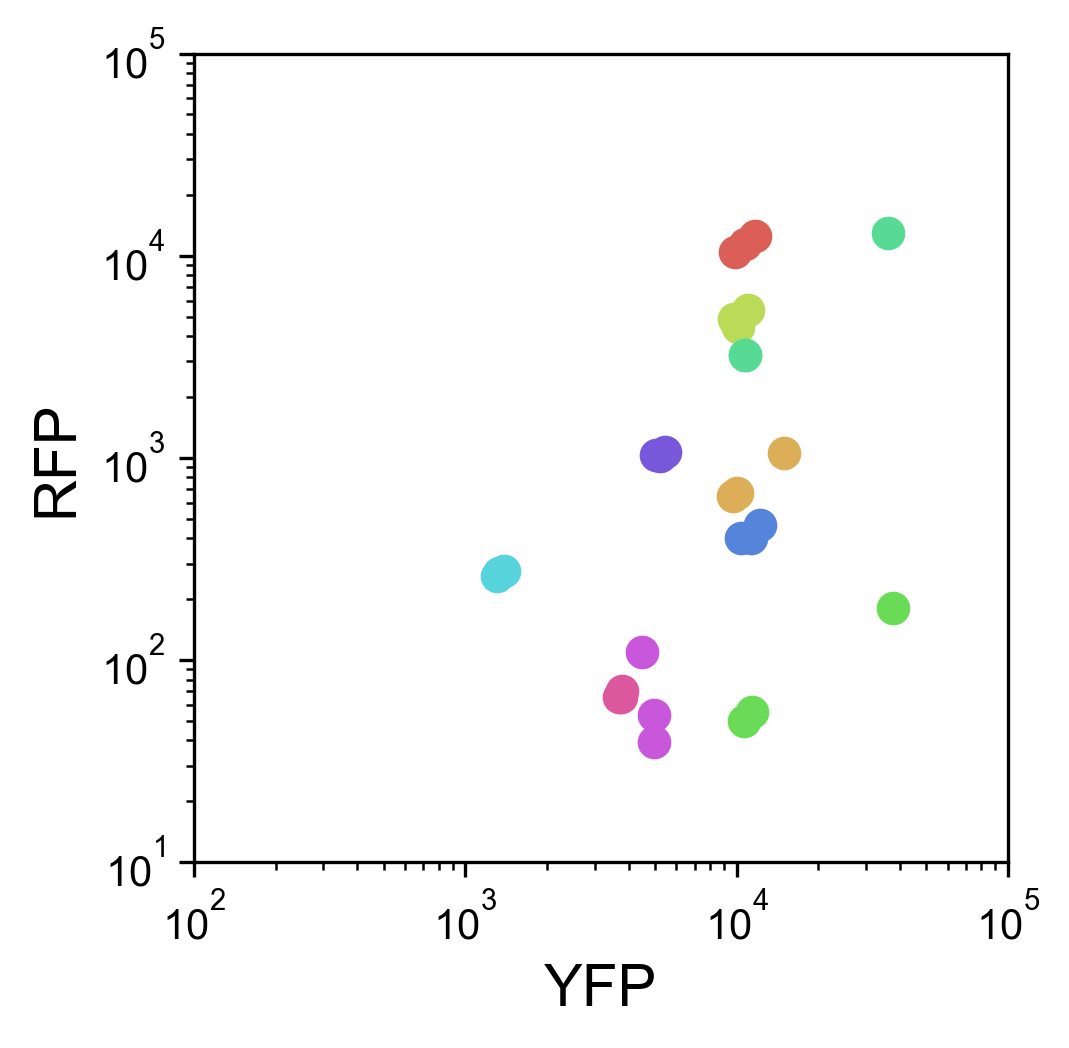

In [52]:
datadf = table.set_index('substrate')
order = ['mScarletI',
         'UBL-mScarletI-NS',
         'RKK-mScarletI-NS',
         'mScarletI-CytoDeg',
         'mScarletI-10-13',
         'mScarletI-ERmDeg',
         'mScarletI-12-86-deg',
         'NLS-mScarletI',
         'NLS-mScarletI-Bgl2',
         'NLS-mScarletI-VHL']

fig = plt.figure(figsize=(3.5, 3.5), dpi=300)
ax = plt.axes()
fontsize=14
colors = sns.color_palette("hls", len(order))

i = 0
legend_elements = []
for idx in order:
    df = datadf.loc[idx, :]
    ax.scatter(df['Alexa Fluor 488-A'], df['DsRed-A'],
               s=50, color=colors[i],
               alpha=1)
    # Set legend elements
    ele = Line2D([0], [0], marker='o', color='w', label=str(idx),
                          markerfacecolor=colors[i], markersize=15)
    legend_elements.append(ele)
    # Advance ticker
    i += 1

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(10, 100000)
ax.set_xlim(100, 100000)

ax.set_ylabel('RFP', fontsize=fontsize)
ax.set_xlabel('YFP', fontsize=fontsize)

#ax.legend(handles=legend_elements, frameon=False, fontsize=12)

fig.savefig('All_TDH3_integrants_flow_scatter.svg')

### Does cell size increase explain 

In [1]:
from importlib import reload
import re
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = 'Arial'

from byc import constants, utilities, files, flow
for mod in [constants, utilities, files, flow]:
    reload(mod)

C:\.byc\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [139]:
path = r"C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\Cooper-Spaller\Data\RPN4_by4741_data.csv"
data = pd.read_csv(path)
data.loc[:, 'Substrate'] = np.nan
for ind in data.index:
    row = data.loc[ind, :]
    substrate = '-'.join([row['N.End'],
                         row['Protein'],
                         row['Tail']])
    data.loc[ind, 'Substrate'] = substrate
    
# Set order of plotting
substrates = ['R-YFP-Su9',
              'R-YFP-eRR',
              'UbL-YFP-Su9',
              'UbL-YFP-eRR']

tails = ['Su9',
         'eRR']

In [59]:
data.head()

,Strain,dsRed,YFP,YFP.dsRed,N.End,Protein,Tail,Sample.,Reference,Expression
0,by4741,1089,493,0.452709,R,YFP,Su9,Specimen_001_A1_A01.fcs,dsRed,CEN
1,by4741,717,388,0.541144,R,YFP,Su9,Specimen_001_A2_A02.fcs,dsRed,CEN
2,by4741,964,426,0.441909,R,YFP,Su9,Specimen_001_A3_A03.fcs,dsRed,CEN
3,by4741,1018,502,0.493124,R,YFP,eRR,Specimen_001_A10_A10.fcs,dsRed,CEN
4,by4741,652,395,0.605828,R,YFP,eRR,Specimen_001_A11_A11.fcs,dsRed,CEN


### Comparing R-YFP-Su9/eRR in BY4741 background

C:\.byc\lib\site-packages\pandas\core\indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


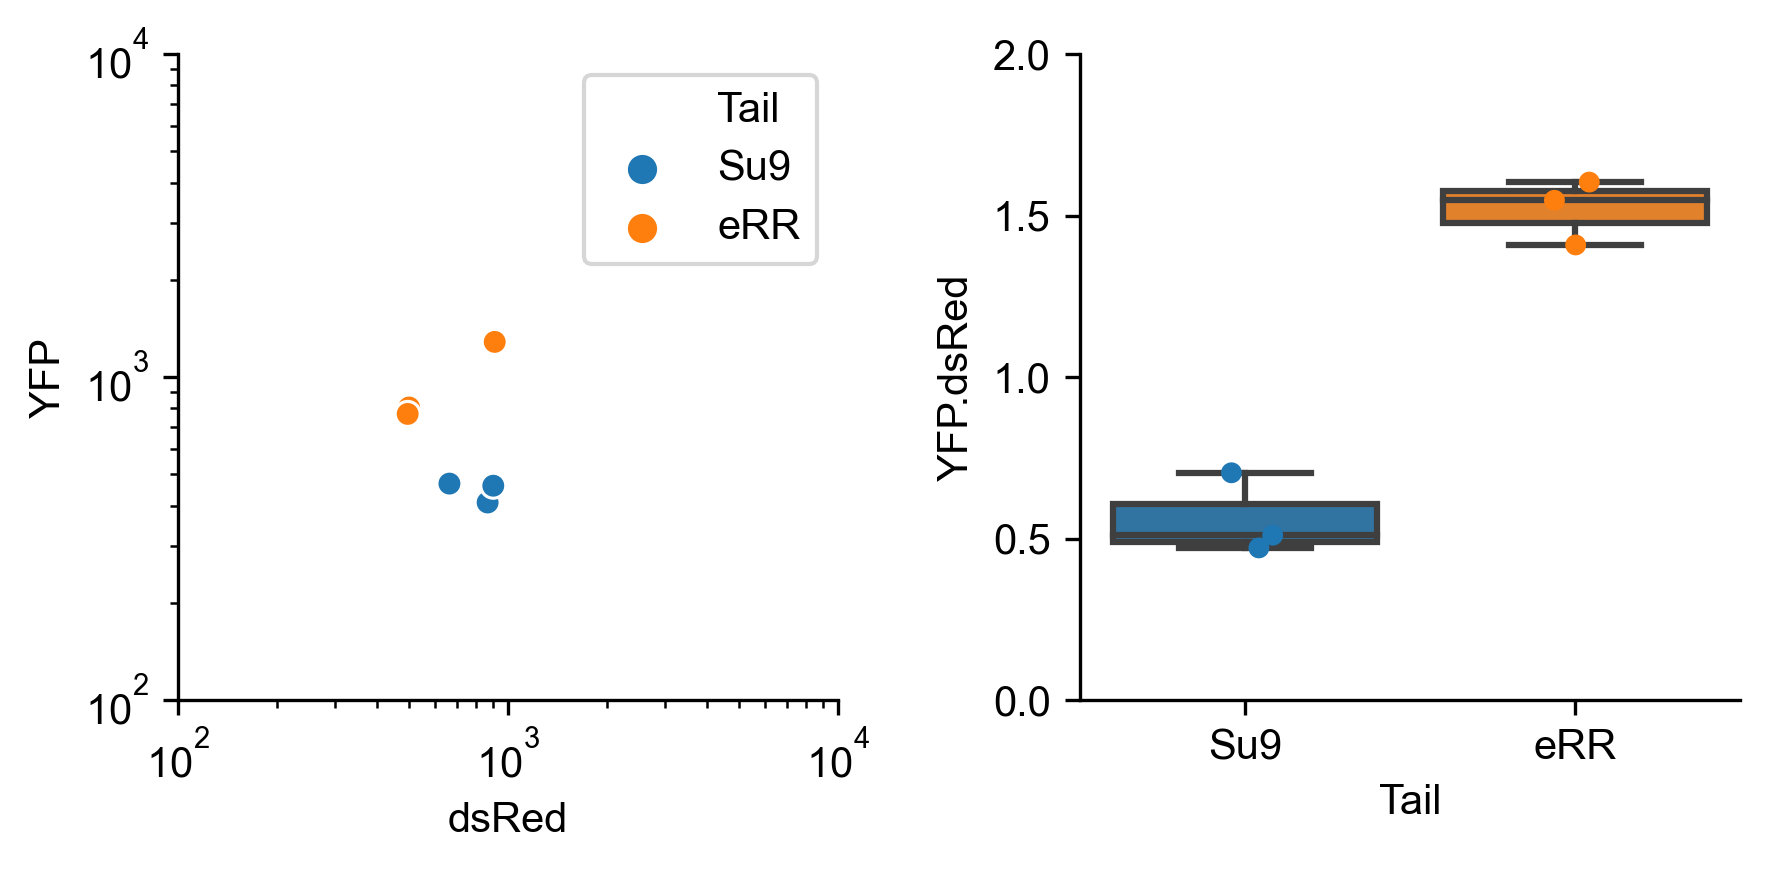

In [142]:
cols = ['Strain', 'N.End']
ind = ('by4741', 'UbL')
df = data.set_index(cols).loc[ind, :].reset_index()

fig = plt.figure(figsize=(6, 3))
fig.set_dpi(300)
ax = fig.add_subplot(121)
sns.scatterplot(x='dsRed', y='YFP', hue='Tail', data=df,
                ax=ax, hue_order=tails)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(100, 10000)
ax.set_xlim(100, 10000)

ax2 = fig.add_subplot(122)
sns.stripplot(y='YFP.dsRed', x='Tail', data=df,
              ax=ax2, order=tails)
sns.boxplot(y='YFP.dsRed', x='Tail', data=df,
            showfliers=False, ax=ax2, order=tails)
ax2.set_ylim(0, 2)
sns.despine()
plt.tight_layout()

### Comparing R-YFP-Su9/eRR in BY4741 and rpn4d background

C:\.byc\lib\site-packages\pandas\core\indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


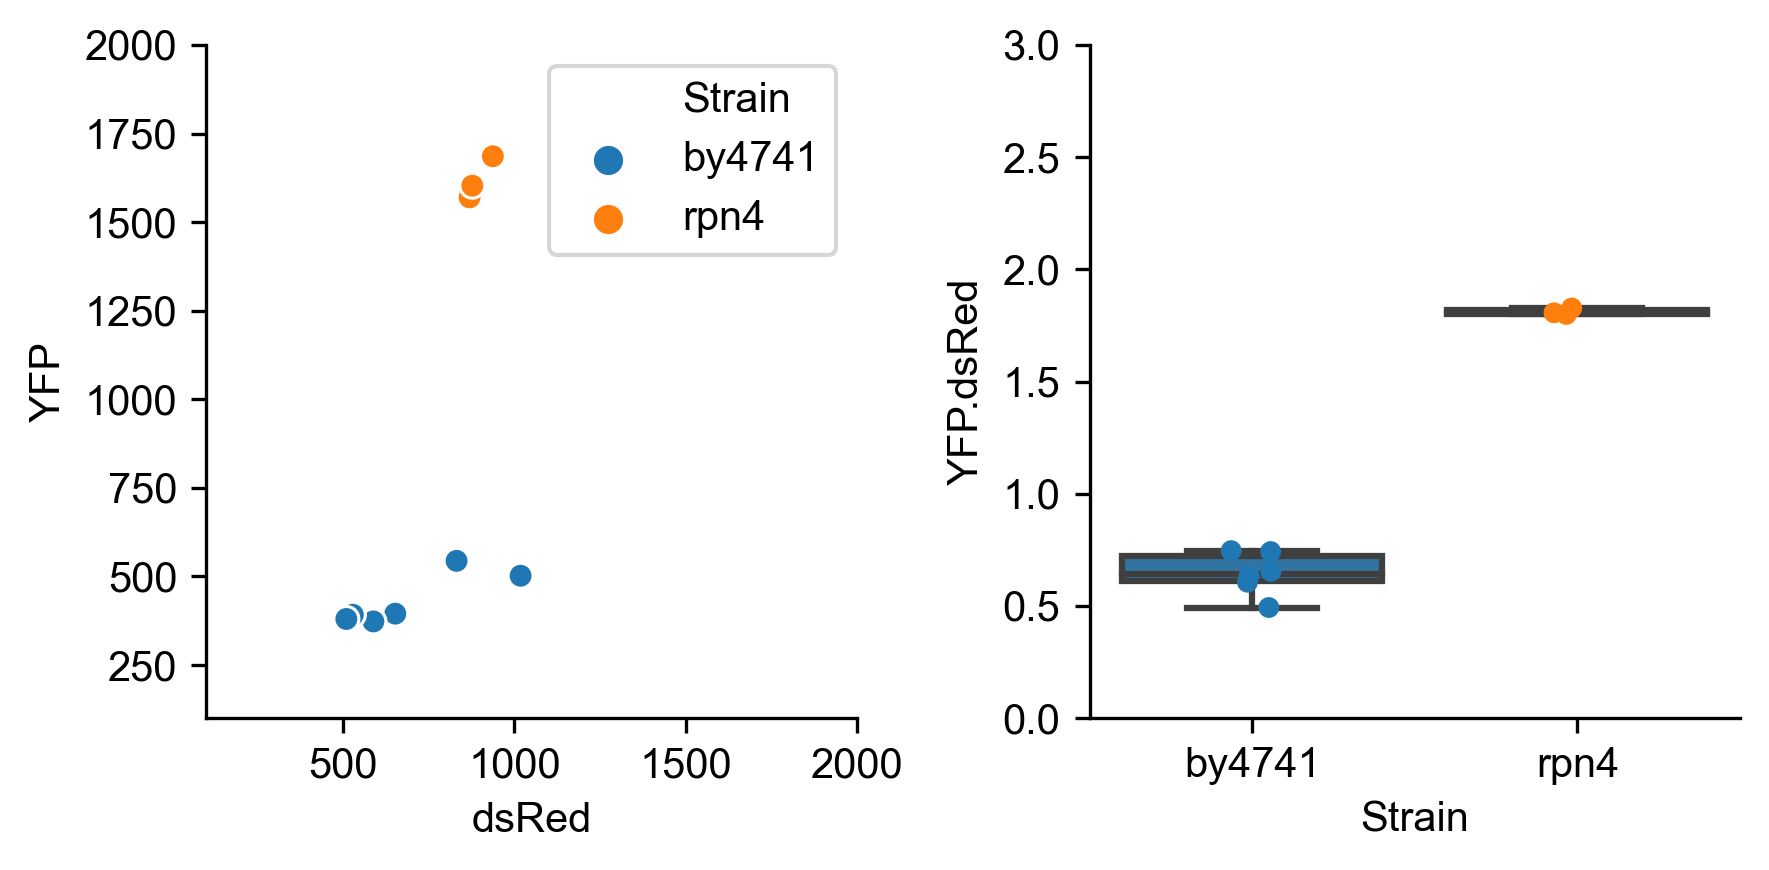

In [62]:
cols = ['N.End', 'Tail']
ind = ('R', 'eRR')
df = data.set_index(cols).loc[ind, :].reset_index()
order = ['by4741', 'rpn4']
fig = plt.figure(figsize=(6, 3))
fig.set_dpi(300)
ax = fig.add_subplot(121)
sns.scatterplot(x='dsRed', y='YFP', hue='Strain', data=df,
                ax=ax, hue_order=order)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim(100, 2000)
ax.set_xlim(100, 2000)

ax2 = fig.add_subplot(122)
sns.stripplot(y='YFP.dsRed', x='Strain', data=df,
              ax=ax2, order=order)
sns.boxplot(y='YFP.dsRed', x='Strain', data=df,
            showfliers=False, ax=ax2, order=order)
ax2.set_ylim(0, 3)
sns.despine()
plt.tight_layout()

### Looking at all substrates in dataset

In [90]:
data.Substrate.unique()

array(['R-YFP-Su9', 'R-YFP-eRR', 'UbL-YFP-eRR', 'UbL-YFP-Su9'],
      dtype=object)

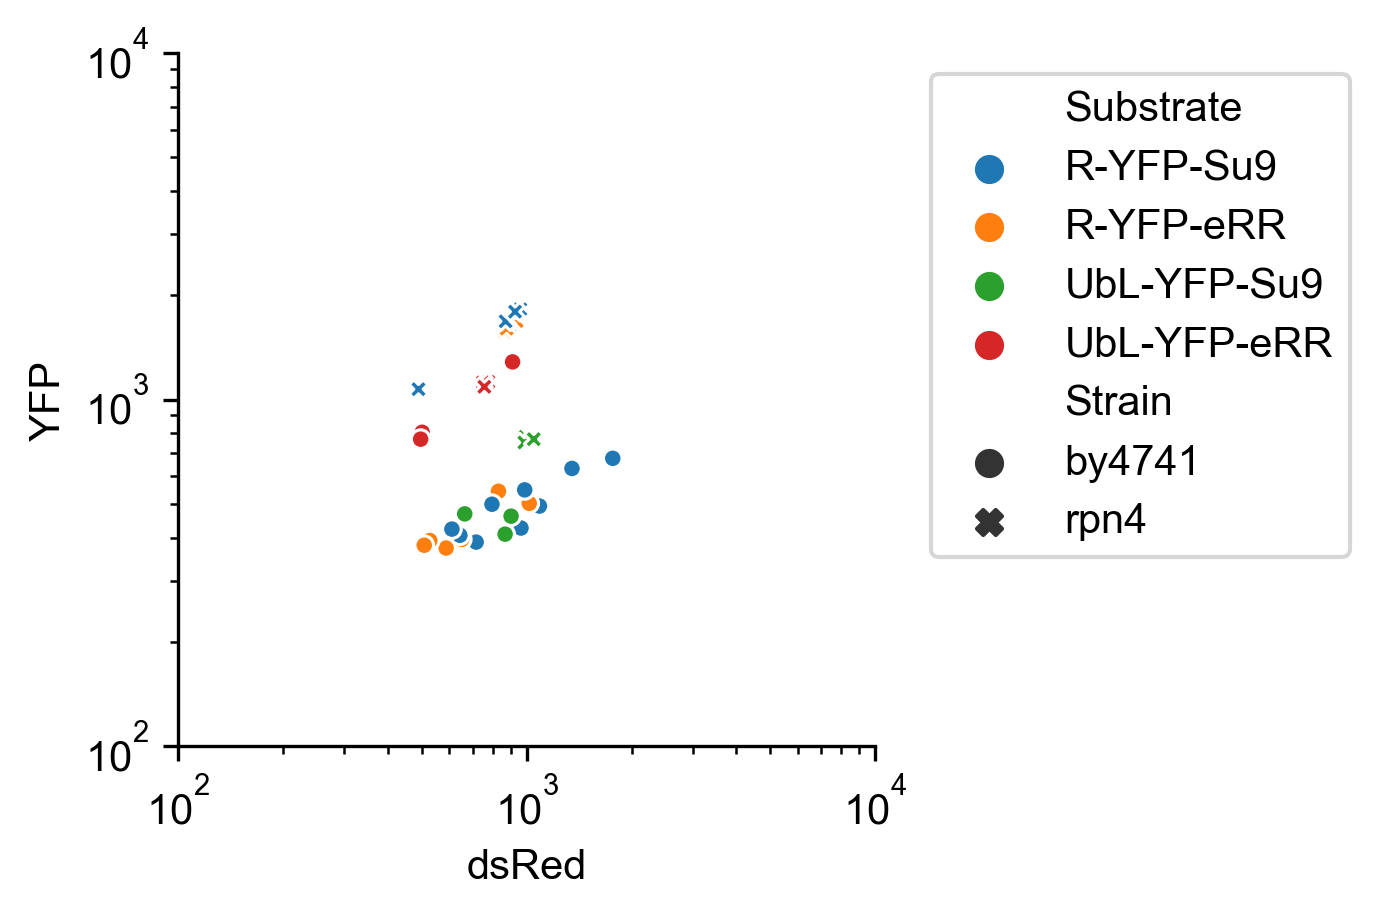

In [138]:
fig = plt.figure(figsize=(3, 3))
fig.set_dpi(300)
ax = fig.add_subplot(111)
sns.scatterplot(x='dsRed', y='YFP', hue='Substrate', style='Strain', data=data,
                ax=ax, hue_order=substrates, s=20)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(100, 10000)
ax.set_xlim(100, 10000)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1))

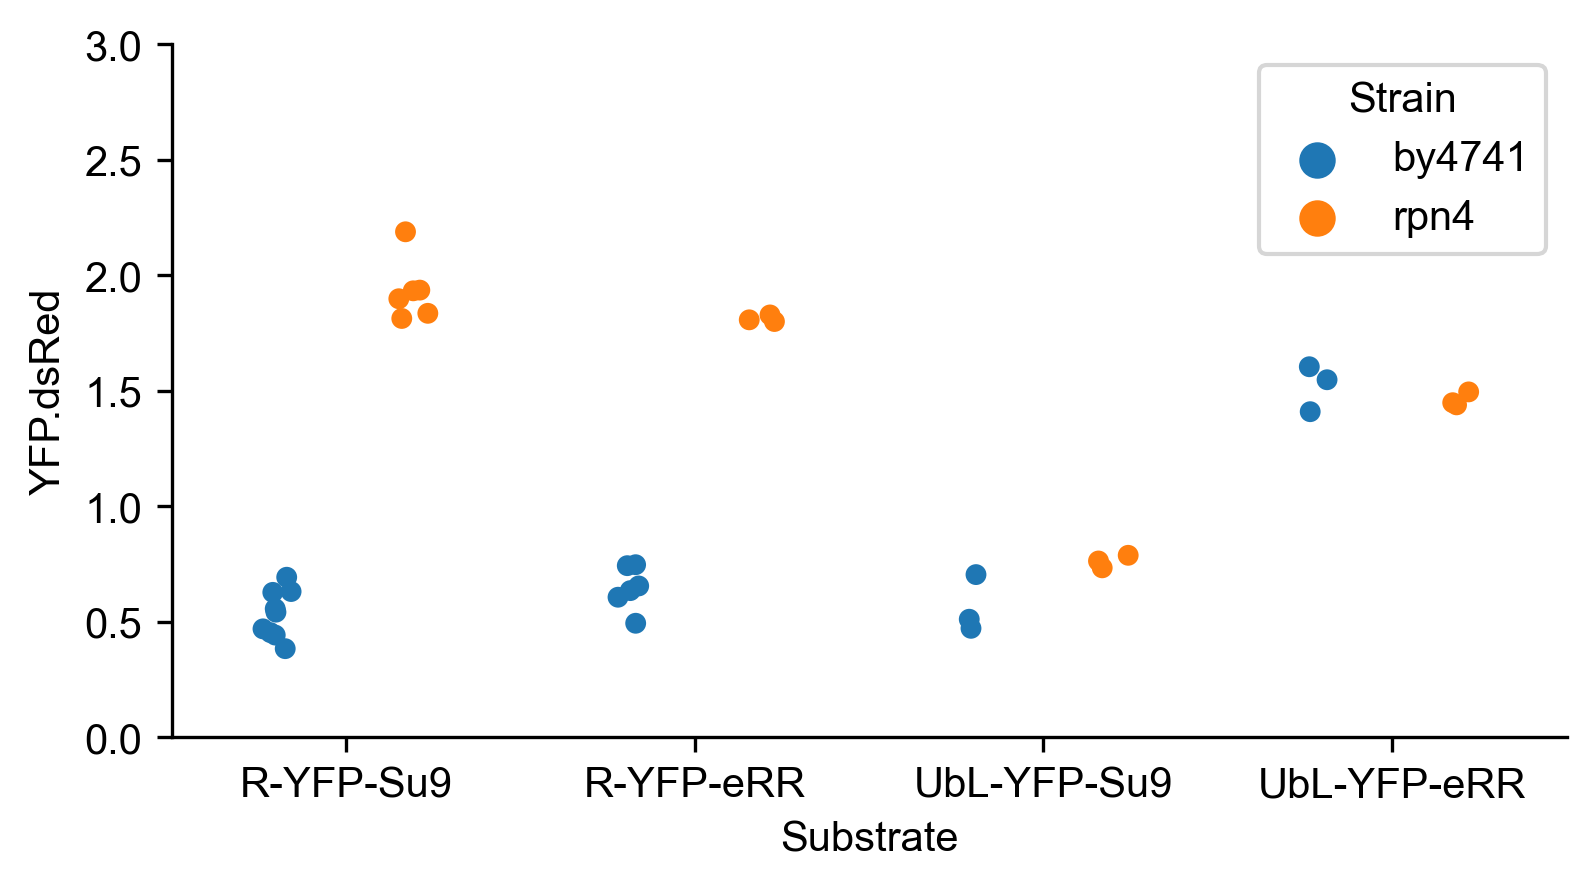

In [94]:
fig = plt.figure(figsize=(6, 3))
fig.set_dpi(300)
ax = fig.add_subplot(111)
sns.stripplot(y='YFP.dsRed', x='Substrate', hue='Strain', data=data,
                ax=ax, dodge=True, order=substrates)

ax.set_ylim(0, 3)
sns.despine()

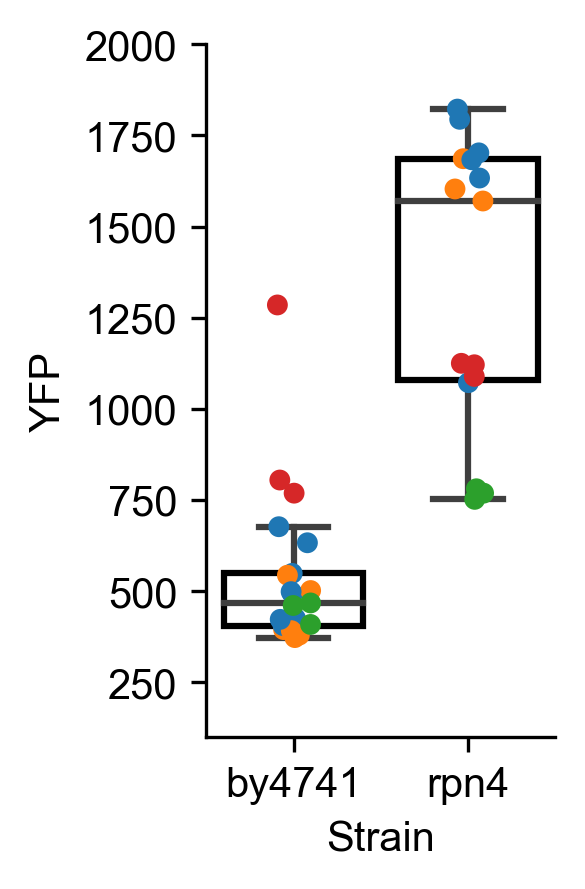

In [135]:
fig = plt.figure(figsize=(1.5, 3))
fig.set_dpi(300)
ax = fig.add_subplot(111)
sns.stripplot(x='Strain', y='YFP', data=data, hue='Substrate',
              hue_order=substrates, ax=ax)
sns.boxplot(x='Strain', y='YFP', data=data,
            ax=ax, showfliers=False)
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
sns.despine()
# ax.set_yscale('log')
ax.set_ylim(100, 2000)
plt.legend([],[], frameon=False)

### Simulations to see how slope changes with yfp:dsred ratio

In [160]:
def get_yfp_rfp(ratio, mean_rfp=1000, sigma=250, n=100):
    rfp = sigma*np.random.randn(n) + mean_rfp
    ratios = (0.15*ratio)*np.random.randn(n) + ratio
    yfp = ratios*rfp
    return yfp, rfp
def 

In [163]:
yfp05, rfp05 = get_yfp_rfp(ratio=0.5)
yfp1, rfp1 = get_yfp_rfp(ratio=1)

In [174]:
ax.scatter(lab)

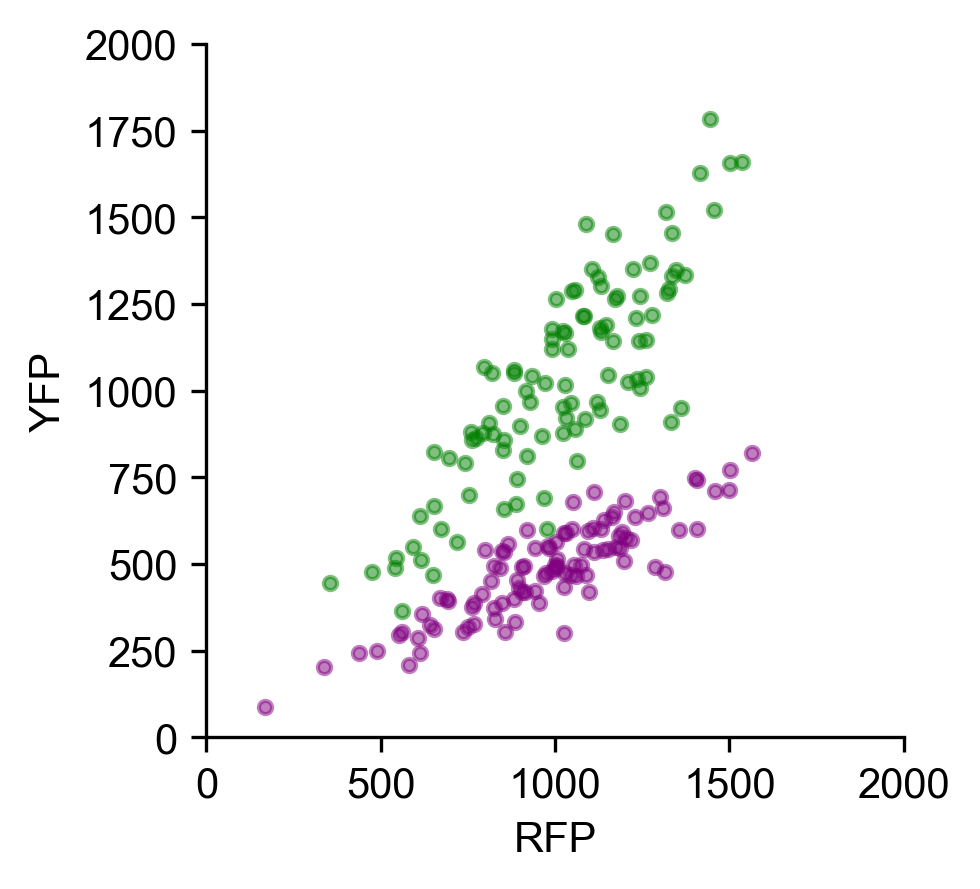

In [178]:
alpha=0.5
size=10
colors = ['purple', 'green']

fig = plt.figure(figsize=(3, 3))
fig.set_dpi(300)
ax = fig.add_subplot(111)
ax.scatter(rfp05, yfp05,
           color=colors[0], alpha=alpha,
           s=size)
ax.scatter(rfp1, yfp1,
           color=colors[1], alpha=alpha,
           s=size)

ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)
ax.set_ylabel('YFP')
ax.set_xlabel('RFP')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

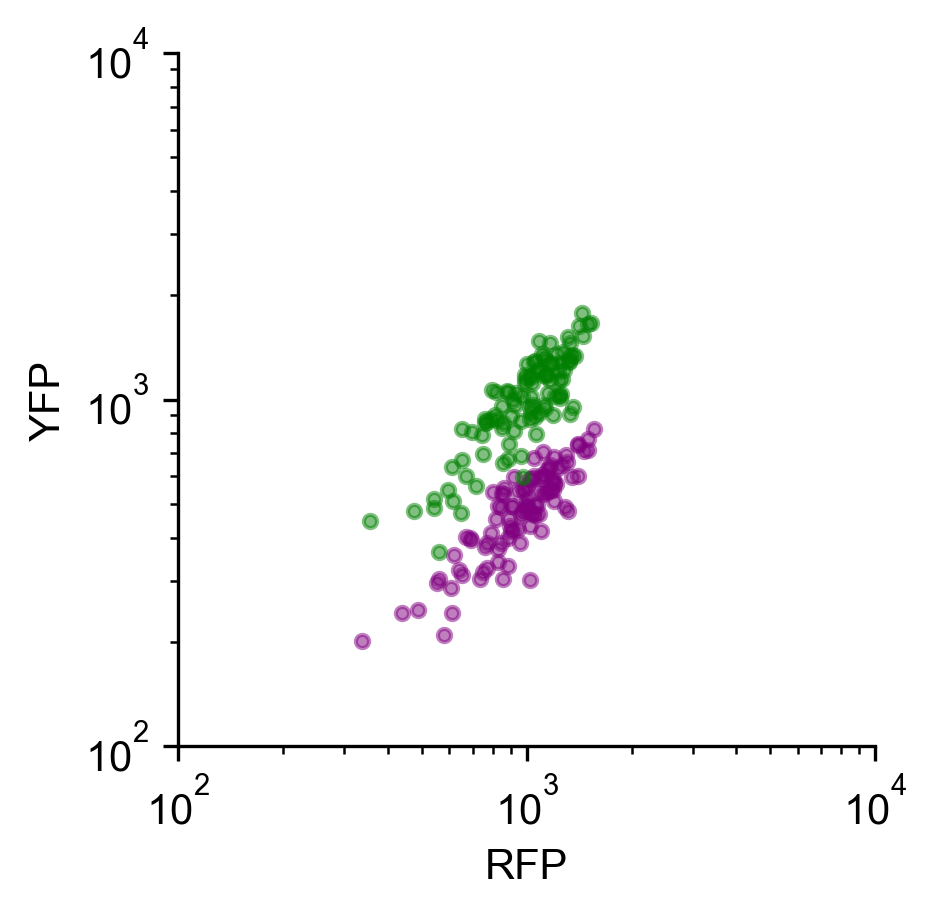

In [179]:
alpha=0.5
size=10
colors = ['purple', 'green']

fig = plt.figure(figsize=(3, 3))
fig.set_dpi(300)
ax = fig.add_subplot(111)
ax.scatter(rfp05, yfp05,
           color=colors[0], alpha=alpha,
           s=size)
ax.scatter(rfp1, yfp1,
           color=colors[1], alpha=alpha,
           s=size)

ax.set_xlim(100, 10000)
ax.set_ylim(100, 10000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('YFP')
ax.set_xlabel('RFP')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## First timelapse experiment 20210329

In [2]:
from importlib import reload
import re
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


import FlowCytometryTools as FCT
from FlowCytometryTools import test_data_file, test_data_dir
from FlowCytometryTools import FCMeasurement

from byc import constants, utilities, files, flow, plotting
for mod in [constants, utilities, files, flow, plotting]:
    reload(mod)

In [3]:
i = file_path.rindex('\\')
file_path[i+1:]

NameError: name 'file_path' is not defined

In [11]:
pd.read_csv(mdfpath)

,expt_date,plasmid,ref_fluor,substrate_fluor,genotype,background,tail,n_end,expr_method,spec_id
0,20210329,pJC248,NaN,mScarletI,BY4741,BY4741,NS,RKK*,(TDH3_TetAptx1)x2_URA_int,Specimen_001_A1_A01
1,20210329,pJC248,NaN,mScarletI,rpn4d,rpn4d,NS,RKK*,(TDH3_TetAptx1)x2_URA_int,Specimen_001_A2_A02
2,20210329,pJC184,NaN,mScarletI,BY4741,BY4741,NS,UBL,(TDH3_TetAptx1)x2_URA_int,Specimen_001_A3_A03
3,20210329,pJC184,NaN,mScarletI,rpn4d,rpn4d,NS,UBL,(TDH3_TetAptx1)x2_URA_int,Specimen_001_A4_A04
4,20210329,pJC031,DsRed,sYFP2,BY4741,BY4741,NS,UBL,TDH3_TetAptx1_HO_int,Specimen_001_A5_A05
5,20210329,pJC031,DsRed,sYFP2,rpn4d,rpn4d,NS,UBL,TDH3_TetAptx1_HO_int,Specimen_001_A6_A06
6,20210329,pJC289,NaN,mScarletI,CMY3465,BY4741,Su9,UBL,(TDH3_TetAptx1)x3_URA_int,Specimen_001_A7_A07
7,20210329,pJC289,NaN,mScarletI,rpn4d,rpn4d,Su9,UBL,(TDH3_TetAptx1)x3_URA_int,Specimen_001_A8_A08
8,20210329,no-plasmid,NaN,NaN,BY4741,BY4741,NaN,NaN,NaN,Specimen_001_A9_A09
9,20210329,pJC071,Bar-sYFP2,mScarletI,BY4741,BY4741,NS,UBL,TDH3_TetAptx2_Cen4,Specimen_001_A10_A10


In [7]:
exptdir = os.path.dirname(mdfpath)
datadir = os.path.join(exptdir, 'data')
timepoint_dirs = [os.path.join(datadir, tpdir) for tpdir in os.listdir(datadir)]
dfs = []
for tpdir in timepoint_dirs:
    print(f'Searching {tpdir} for ')
    timestamp_mins = int(tpdir[-3:])
    timestamp_hrs = timestamp_mins/60
    for fn in os.listdir(tpdir):
        if fn[-4:] == '.fcs':
            file_path = os.path.join(tpdir, fn)
            print(f'Found file at {file_path}')
            i = file_path.rindex('\\')
            sample_id = f'{file_path[i+1:-4]}'
            sample_index = int(sample_id[-2:])
            sample = FCMeasurement(ID=sample_id, datafile=file_path)
            df = sample.data
            df.loc[:, 'sample_id'] = sample_id
            df.loc[:, 'sample_index'] = sample_index
            df.loc[:, 'hours'] = timestamp_hrs
            df.loc[:, 'minutes'] = timestamp_mins
            dfs.append(df)
            
alldf = pd.concat(dfs, ignore_index=True)
alldf.sort_values(by='sample_index', inplace=True)

Searching C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME000 for 
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME000\Specimen_001_A10_A10.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME000\Specimen_001_A11_A11.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME000\Specimen_001_A1_A01.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME000\Specimen_001_A2_A02.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME000\Specimen_001_A3_A03.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME000\Specimen_001_A4_A04.fcs
Found file at C:/Users/John Cooper

Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME100\Specimen_001_A1_A01.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME100\Specimen_001_A2_A02.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME100\Specimen_001_A3_A03.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME100\Specimen_001_A4_A04.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME100\Specimen_001_A5_A05.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME100\Specimen_001_A6_A06.fcs
Found file at C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/flow_cytometry\20210329\data\03292021-jpc-TIME100\Specimen_001_A7_A07.fcs
Found file at

In [39]:
'Specimen_001_A1_A01' in list(mdf.index)

True

In [44]:
alldf.loc[alldf.sample_id==sample_id, col]

331995   NaN
331991   NaN
331992   NaN
331993   NaN
331994   NaN
          ..
616065   NaN
616064   NaN
616063   NaN
616061   NaN
616120   NaN
Name: expr_method, Length: 667, dtype: float64

In [45]:
# Add data labels to alldf based on the master index
mdfpath = expts.paths_dict['20210329']
mdf = pd.read_csv(mdfpath)
mdf.set_index('sample_id', inplace=True)
for col in mdf.columns:
    alldf.loc[:, col] = np.nan

for sample_id in alldf.sample_id.unique():
    print(sample_id)
    if sample_id in list(mdf.index):
        print('Found entry in master index')
        # Add information from master index to
        # raw flow data
        for col in mdf.columns:
            alldf.loc[alldf.sample_id==sample_id, col] = mdf.loc[sample_id, col]

Specimen_001_A1_A01
Found entry in master index
Specimen_001_A2_A02
Found entry in master index
Specimen_001_A3_A03
Found entry in master index
Specimen_001_A4_A04
Found entry in master index
Specimen_001_A5_A05
Found entry in master index
Specimen_001_A6_A06
Found entry in master index
Specimen_001_A7_A07
Found entry in master index
Specimen_001_A8_A08
Found entry in master index
Specimen_001_A9_A09
Found entry in master index
Specimen_001_A10_A10
Found entry in master index
Specimen_001_A11_A11
Found entry in master index
Specimen_001_A12_A12


In [31]:
bg_spec_id = 'Specimen_001_A9_A09'
bg_df = alldf.loc[alldf.sample_id==bg_spec_id]

### Raw Data Plots

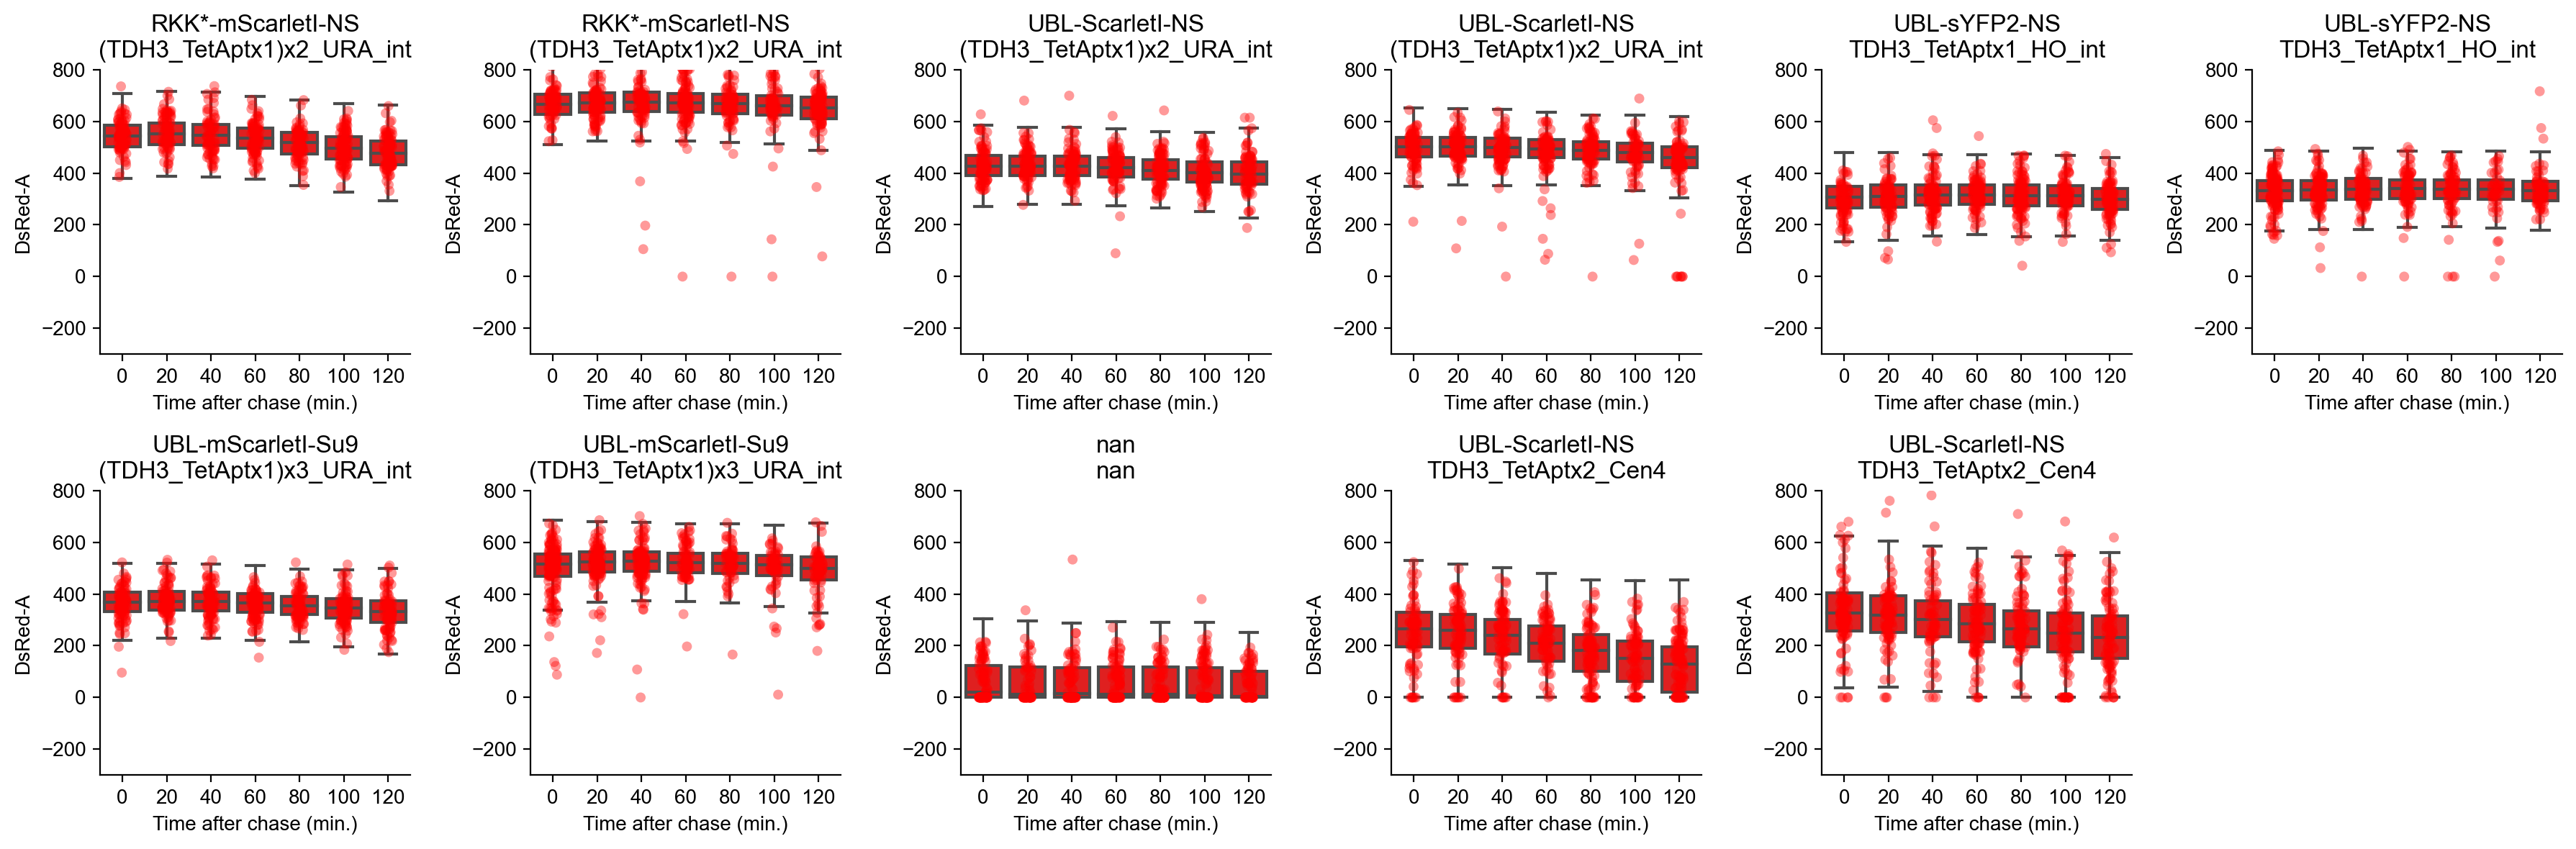

In [47]:
fig = plt.figure(figsize=(18, 6))
fig.set_dpi(200)
color='red'
y_var = 'DsRed-A'
for i, spec_id in enumerate(list(alldf.sample_id.unique()[0:11])):
    
    sampledf = alldf.loc[alldf.sample_id==spec_id, :]
    subdf = sampledf.sample(600)


    ax = fig.add_subplot(2, 6, i+1)
    sns.stripplot(x='minutes', y=y_var, data=subdf,
                  ax=ax, color=color, alpha=0.4)
    sns.boxplot(x='minutes', y=y_var, data=sampledf,
                  ax=ax, color=color, showfliers=False)

    ax.set_xticklabels(np.arange(0, 140, 20))
    ax.set_xlabel('Time after chase (min.)')
    ax.set_ylim(-300, 800)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    substrate = sampledf.substrate.unique()[0]
    expr_meth = sampledf.expr_method.unique()[0]
    title = f'{substrate}\n{expr_meth}'
    ax.set_title(title)
    # ax.set_yscale('log')
plt.tight_layout()

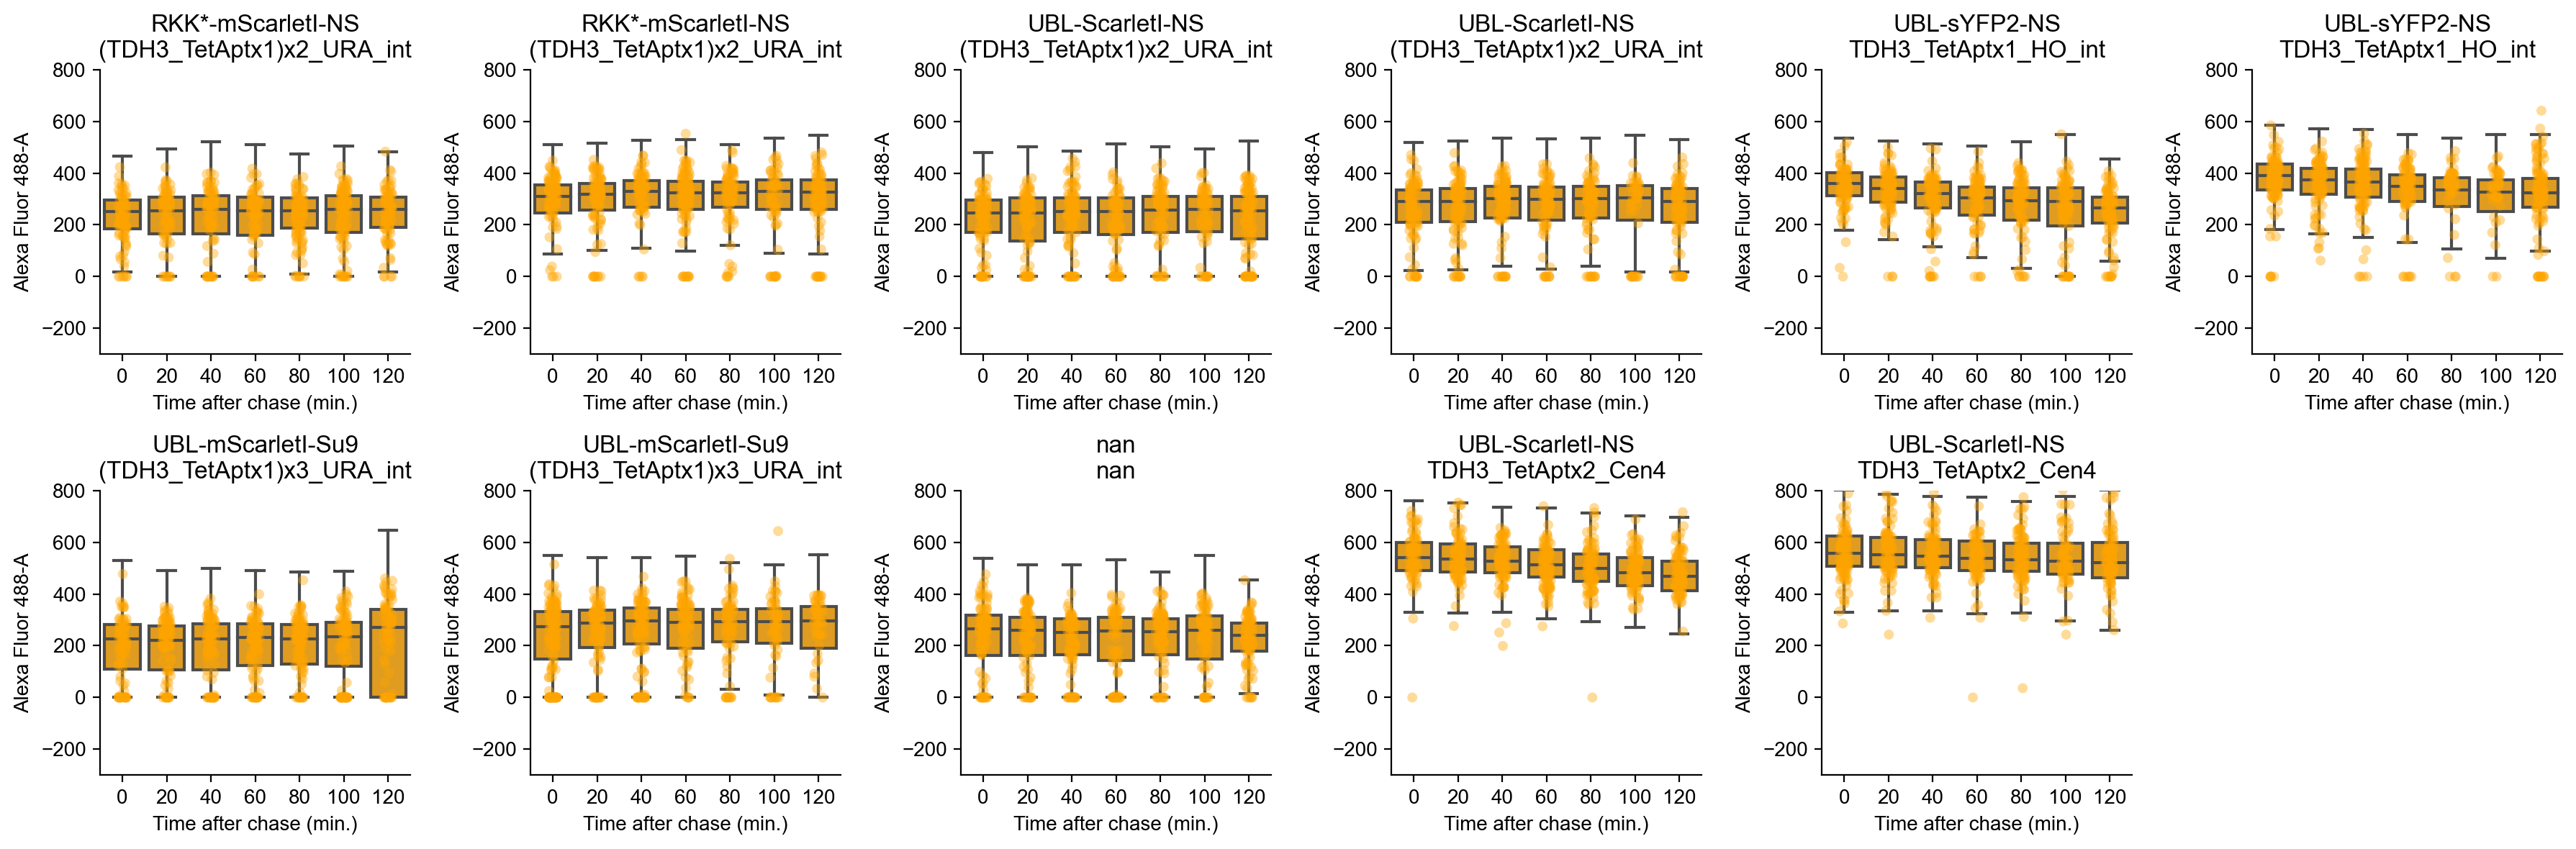

In [48]:
fig = plt.figure(figsize=(18, 6))
fig.set_dpi(200)
color='orange'
y_var = 'Alexa Fluor 488-A'
for i, spec_id in enumerate(list(alldf.sample_id.unique()[0:11])):
    
    sampledf = alldf.loc[alldf.sample_id==spec_id, :]
    subdf = sampledf.sample(600)


    ax = fig.add_subplot(2, 6, i+1)
    sns.stripplot(x='minutes', y=y_var, data=subdf,
                  ax=ax, color=color, alpha=0.4)
    sns.boxplot(x='minutes', y=y_var, data=sampledf,
                  ax=ax, color=color, showfliers=False)

    ax.set_xticklabels(np.arange(0, 140, 20))
    ax.set_xlabel('Time after chase (min.)')
    ax.set_ylim(-300, 800)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    substrate = sampledf.substrate.unique()[0]
    expr_meth = sampledf.expr_method.unique()[0]
    title = f'{substrate}\n{expr_meth}'
    ax.set_title(title)
    # ax.set_yscale('log')
plt.tight_layout()

### Plotting aggregated, bg subtracted data

In [50]:
alldf_agg = alldf.pivot_table(index=['sample_id', 'minutes'], aggfunc='mean').reset_index()
y_var = 'DsRed-A'
y_var2 = 'Alexa Fluor 488-A'
bg = bg_df[y_var].mean()
bg2 = bg_df[y_var2].mean()
alldf_agg.loc[:, f'{y_var}_bg_sub'] = alldf_agg[y_var] - bg
alldf_agg.loc[:, f'{y_var2}_bg_sub'] = alldf_agg[y_var2] - bg2
y_var = f'{y_var}_bg_sub'
y_var2 = f'{y_var2}_bg_sub'

AttributeError: 'DataFrame' object has no attribute 'expr_method'

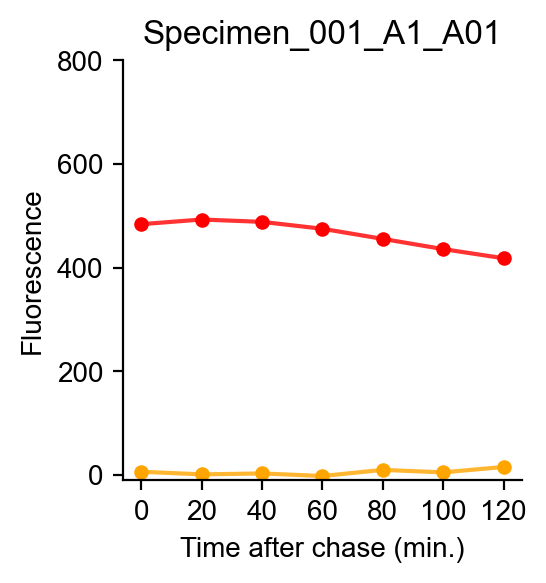

In [51]:
fig = plt.figure(figsize=(18, 6))
fig.set_dpi(200)
alldf_agg.sort_values(by='sample_index', inplace=True)
y_var = 'DsRed-A_bg_sub'
y_var2 = 'Alexa Fluor 488-A_bg_sub'
for i, spec_id in enumerate(list(alldf_agg.sample_id.unique()[0:11])):

    subdf = alldf_agg.loc[alldf_agg.sample_id==spec_id, :]
    ax = fig.add_subplot(2, 6, i+1)
    sns.scatterplot(x='minutes', y=y_var, data=subdf,
                    ax=ax, color='Red', alpha=1)
    sns.scatterplot(x='minutes', y=y_var2, data=subdf,
                    ax=ax, color='Orange', alpha=1)
    
    sns.lineplot(x='minutes', y=y_var, data=subdf,
                    ax=ax, color='Red', alpha=0.8)
    sns.lineplot(x='minutes', y=y_var2, data=subdf,
                    ax=ax, color='Orange', alpha=0.8)

    ax.set_xticklabels(np.arange(0, 140, 20))
    ax.set_xticks(np.arange(0, 140, 20))
    ax.set_xlabel('Time after chase (min.)')
    ax.set_ylim(0, 1.4)
    ax.set_ylabel('Fluorescence')
    ax.set_ylim(-10, 800)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(spec_id)
    expr_meth = subdf.expr_method.unique()[0]
    title = f'{substrate}\n{expr_meth}'
    ax.set_title(title)
    # ax.set_yscale('log')
plt.tight_layout()

### Normalized to t0

<ipython-input-248-e9f603e354d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='minutes', inplace=True)
<ipython-input-248-e9f603e354d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='minutes', inplace=True)
<ipython-input-248-e9f603e354d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='minutes', inplace=True)
<ipython-input-248-e9f603e354d7>:11: SettingWithCopy

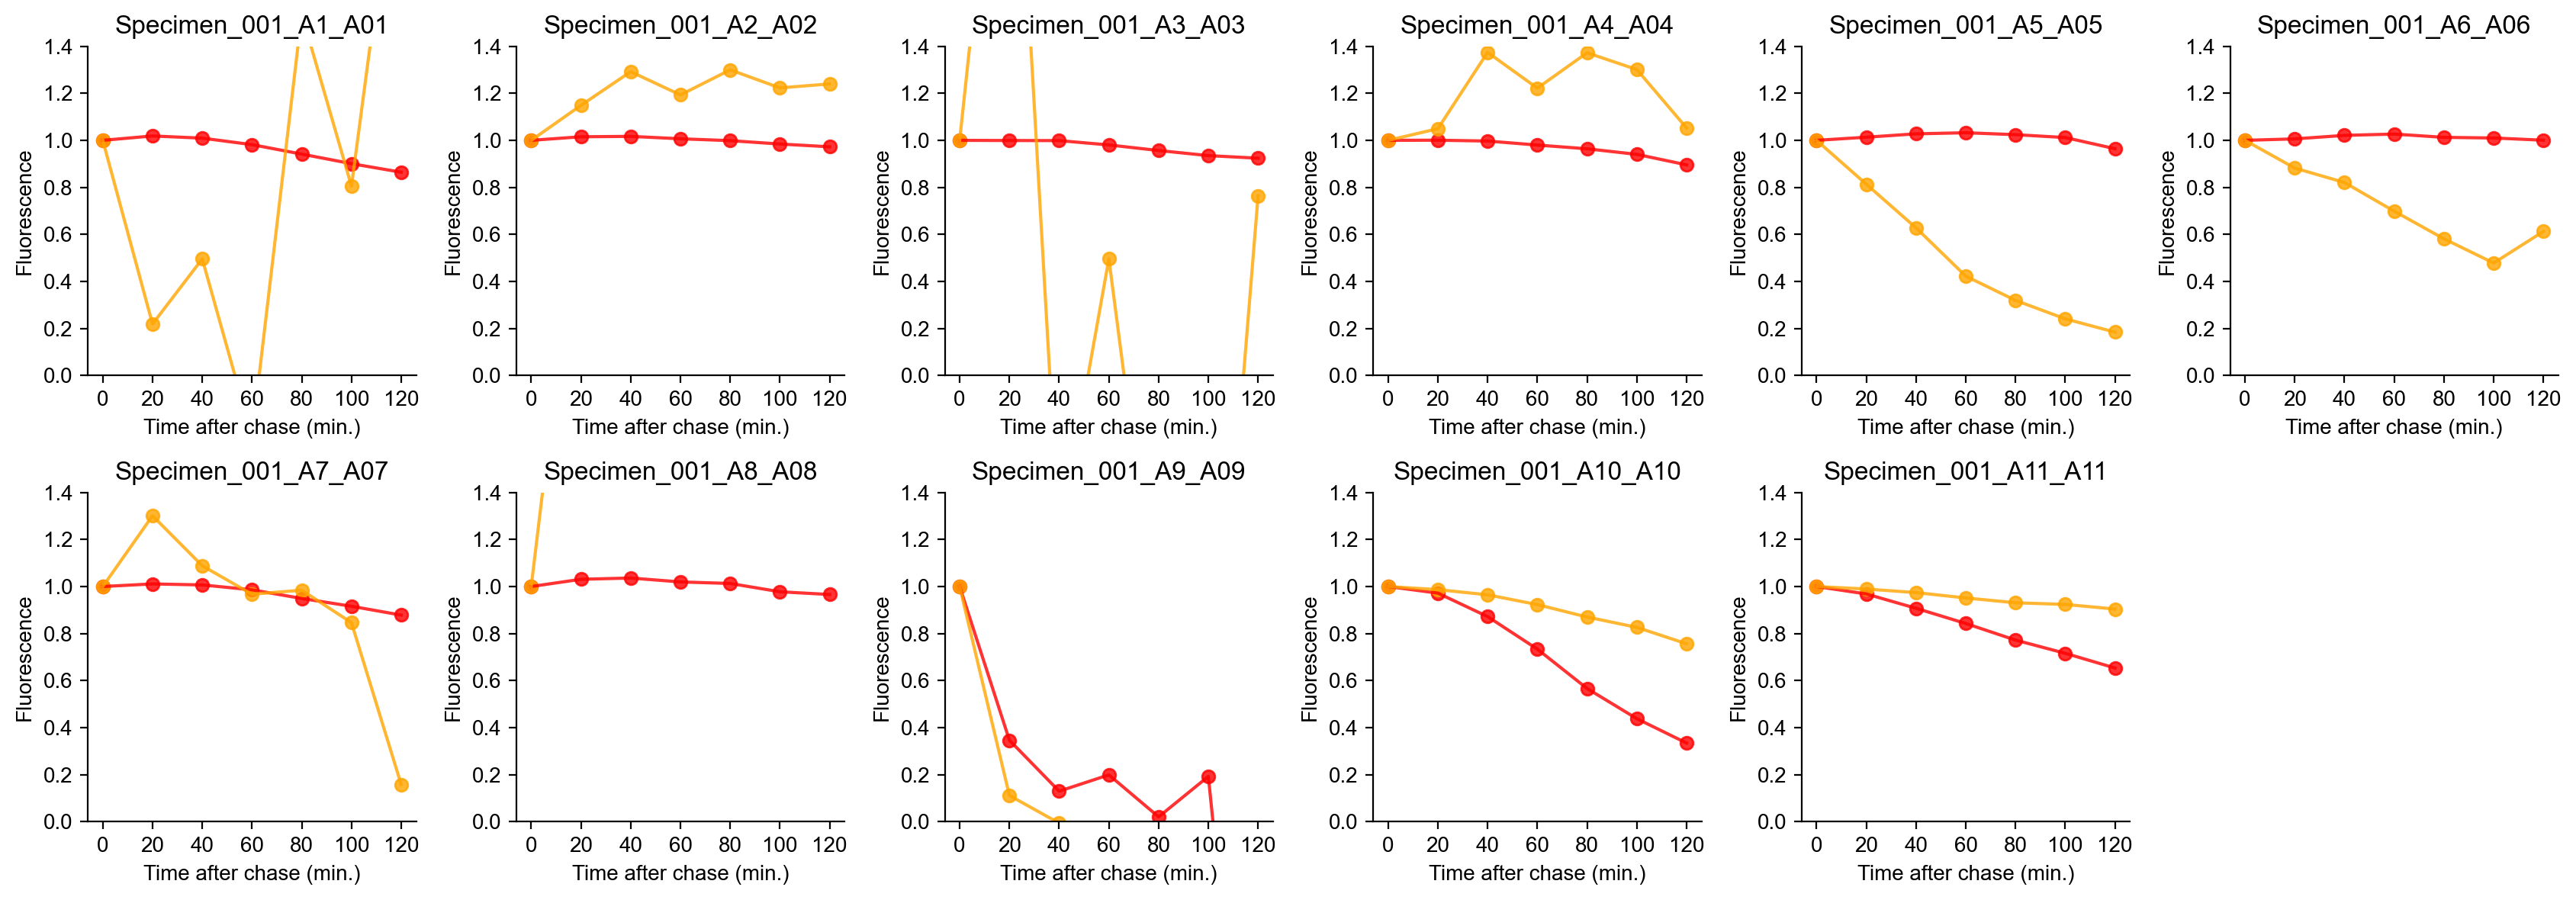

In [248]:
fig = plt.figure(figsize=(17, 6))
fig.set_dpi(200)
alldf_agg.sort_values(by='sample_index', inplace=True)
y_var = 'DsRed-A_bg_sub'
y_var2 = 'Alexa Fluor 488-A_bg_sub'
x_var = 'minutes'
for i, spec_id in enumerate(list(alldf_agg.sample_id.unique()[0:11])):
    ax = fig.add_subplot(2, 6, i+1)
    
    subdf = alldf_agg.loc[alldf_agg.sample_id==spec_id, :]
    subdf.sort_values(by='minutes', inplace=True)
    x = subdf[x_var].values
    y = subdf[y_var].values
    y2 = subdf[y_var2].values
    y_norm = y/y[0]
    y2_norm = y2/y2[0]
    
    ax.scatter(x, y=y_norm,
                   color='Red', alpha=0.8)
    ax.scatter(x, y=y2_norm,
                   color='Orange', alpha=0.8)    
    ax.plot(x, y_norm,
           color='Red', alpha=0.8)
    ax.plot(x, y2_norm,
           color='Orange', alpha=0.8)
    
    ax.set_xticklabels(np.arange(0, 140, 20))
    ax.set_xticks(np.arange(0, 140, 20))
    ax.set_xlabel('Time after chase (min.)')
    ax.set_ylim(0, 1.4)
    ax.set_ylabel('Fluorescence')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(spec_id)
    # ax.set_yscale('log')
plt.tight_layout()